# Laboratorio 1: Regresión en Boston

## Laboratorio del Grupo 4_2:
* Bornancini Verónica
* Berberian Ará
* Ramos Matias
* Juarez Ezequiel
* Garrigo Edgardo
* Saurit Lucas

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
boston['data']           # matriz con los datos de entrada (atributos)
boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [5]:
from sklearn.model_selection import train_test_split

X, Y = boston['data'], boston['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea
Responda las siguientes preguntas:   


1.¿De qué se trata el conjunto de datos?    
2.¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?   
3.¿Qué información (atributos) hay disponibles para hacer la predicción?    
4.¿Qué atributos imagina ud. que serán los más determinantes para la predicción?    
5.¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

In [6]:
import pandas as pd

tabla = pd.DataFrame(boston.data, columns = boston.feature_names)
tabla[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**RESPUESTAS:**    
**1)** El dataset reune información sobre **506** viviendas ubicadas en el área metropolitana de Boston. Cada una de las viviendas tiene especificada información que puede influir en el precio final de la misma, algunos de estos atributos son: el lugar donde se encuentra, los servicios, el tipo de barrio, la facilidad de acceso a la misma, y la cercanía a diferentes instituciones. Este dataset pertenece a un paper publicado por *Harrison et all.1978* (DOI: 10.1016/0095-0696(78)90006-). 

**2)** Nuestra variable objetivo según lo planteado anteriormente será **MEDV (Target)**, la cual se refiere al valor medio de viviendas ocupadas por sus propietarios en miles de dólares.
* (The last row describes the median price of owner-occupied homes (this leaves out homes that are rented out), and it's usually the row that we are trying to predict when we use it for regression tasks. https://towardsdatascience.com/things-you-didnt-know-about-the-boston-housing-dataset-2e87a6f960e8)   

**3)** Los atributos disponibles para hacer el análisis son 13:
* 1- **CRIM:** Tasa de crimen per capita por ciudad.
* 2- **ZN:** Proporción del área recidencial para lotes mayores de 25,000 pies cuadrados.
* 3- **INDUS:** Proporción de acres de negocios no minoristas por ciudad.
* 4- **CHAS:** Indica si el terreno limita con el rio Charles (Si limita=1, No limita=0).
* 5- **NOX:** Concentración de óxido nítrico (partes por 10 millones).
* 6- **RM:** Promedio de habitaciones por vivienda.
* 7- **AGE:** Proporción de viviendas ocuapdas por sus propietarios, construidas antes de 1940.
* 8- **DIS:** Distancias ponderadas hacia 5 centros de empleo en Boston.
* 9- **RAD:** Indice de accesibilidad a las autopistas radiales.
* 10- **TAX:** Tasa del impuesto a la propiedad (cada $10,000).
* 11- **PTRATIO:** Relacion alumno/profesor por ciudad. 
* 12- **B:** 1.000(Bk - 0.63)^2 donde Bk es la proporcion de personas afroamericanas por ciudad.
* 13- **LSTAT:** Porcentaje de poblacion de clase baja.

**4)** Posiblemente los atributos mas relevantes sean **CRIM**, **RM**, **DIS**, **RAD** y **TAX**.    

**5)** Observaciones a priori:
* Hay que tener en cuenta que el tamaño del dataset es pequeño (506 registros) comparado con la gran magnitud de datos que se pueden relevar actualemnte.
* Es posible observar que algunas variables como **B** y **LSTAT** tienen un sesgo social lo cual no sería eticamente correcto. 
* Además en el dataset también encontramos 2 problemas como lo son los:    
 *Datos censurados:* Valor máximos de la variable **MEDV** en 50k USD.    
 *Datos incorrectos:* hay ocho registros con error en el valor de los precios medios.   

## Ejercicio 2: Visualización de los Datos

#### **1.** Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.


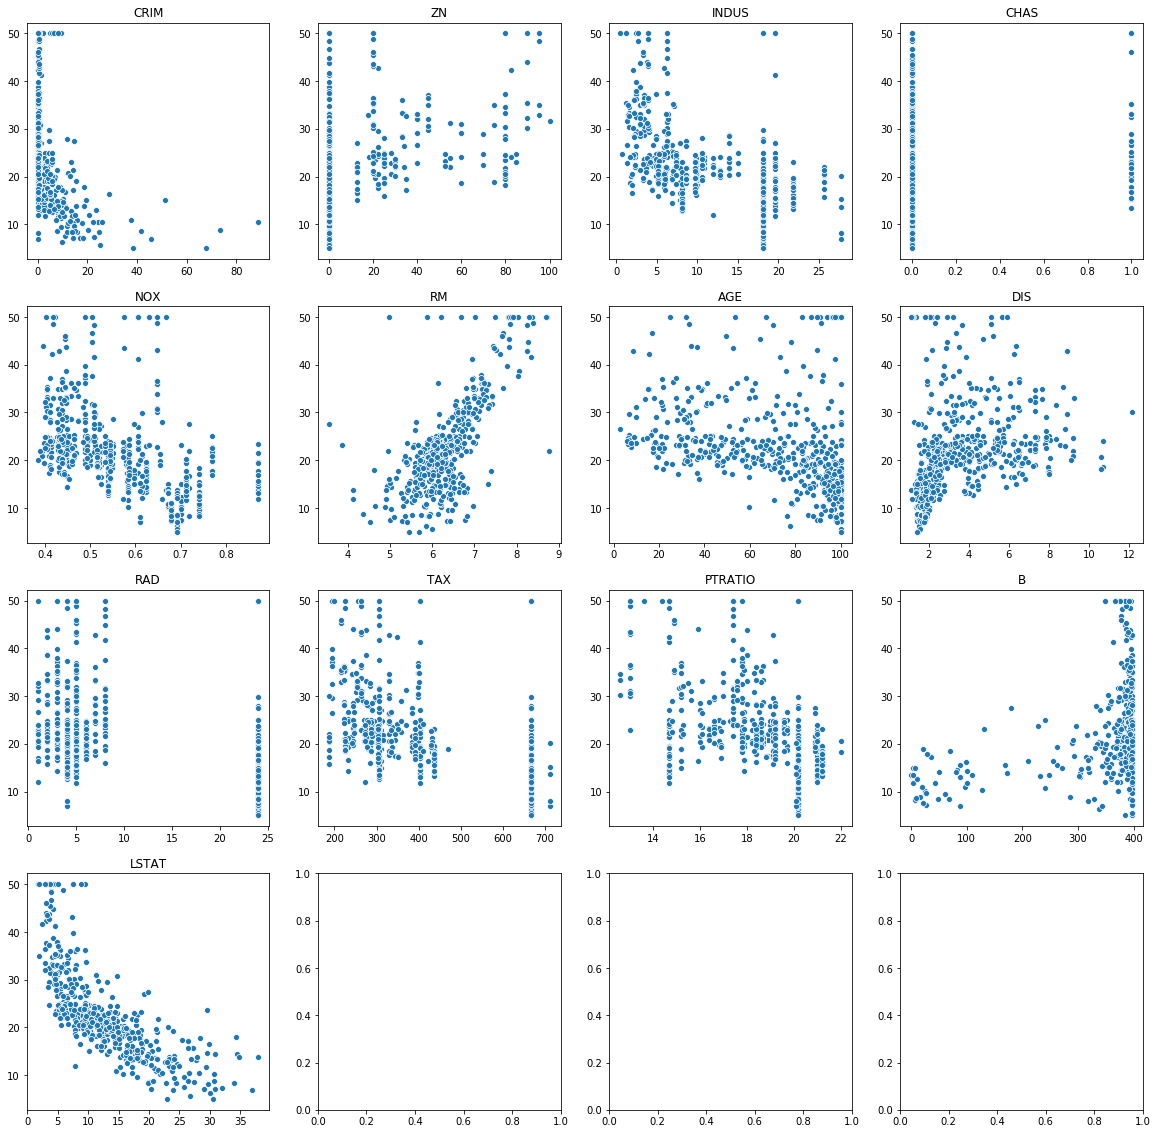

In [69]:
import seaborn
import matplotlib.pyplot as plt

# boston['feature_names'] => nombres de los atributos para cada columna de 'data'

fig,axs = plt.subplots(4,4,figsize=(20,20))
row = 0
col = 0

for feature in boston['feature_names']:
        selector = (boston['feature_names'] == feature)
        seaborn.scatterplot(X[:, selector].flatten(), Y, ax=axs[row, col])
        axs[row, col].set_title(feature)
        col = col + 1 if col < 3 else 0
        row = row + 1 if col == 0 else row
plt.show()

#### **2.** Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.

* Según el análisis hecho a simple vista podemos obervar que las variables **RM** y **LSTAT** son las que presentan una mayor correlacionan con **MEDV**(target).
* En menor medida pareciera que las variable **NOX** y **DIS** tuvieran una correlación, pero esta no parece ser significativa a simple vista. Por lo tanto necesitamos un análisis a posteriori, luego de haber limpiado los datos. 

#### **3.** Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

* **RM** (Promedio de habitaciones por vivienda)
* **LSTAT** (Porcentaje de poblacion de clase baja)
* **CRIM** (Tasa de crimen per capita por ciudad)

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
# 1. Resolver acá. Ayuda:
feature = 'CRIM'  # selecciono el atributo 'CRIM'
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

In [ ]:
# 2. Instanciar y entrenar acá.

In [ ]:
# 3. Predecir y evaluar acá.

In [ ]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
# plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.

In [ ]:
# 2. Graficar curvas de error acá.

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'ZN')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

In [ ]:
# 2. Resolver acá.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
